<a href="https://colab.research.google.com/github/rameenhamad/Elvovo_ML_Internship_Tasks/blob/main/3_Forest_Cover_Type_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix

In [69]:
data = pd.read_csv("/content/drive/MyDrive/Elvovo_Tasks/3.Forest_Cover_Type/covtype.csv")
data["Wilderness_Area1"]

,Wilderness_Area1
0,1
1,1
2,1
3,1
4,1
...,...
581007,0
581008,0
581009,0
581010,0


In [70]:
data.drop_duplicates()
data.shape
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [71]:
data["Hillshade_9am"].unique()

array([221, 220, 234, 238, 230, 222, 223, 228, 218, 248, 213, 224, 216,
       214, 206, 252, 225, 215, 229, 240, 253, 254, 233, 231, 200, 146,
       232, 227, 149, 237, 148, 239, 226, 207, 245, 210, 217, 235, 241,
       166, 191, 151, 190, 203, 219, 244, 193, 189, 208, 204, 120, 249,
       201, 187, 205, 197, 194, 145, 150, 242, 212, 202, 178, 209, 115,
       184, 156, 185, 164, 247, 169, 236, 188, 176, 211, 196, 198, 199,
       177, 181, 183, 179, 250, 246, 243, 251, 186, 192, 182, 165, 163,
       180, 195, 171, 153, 138, 174, 154, 170, 133, 142, 141, 152, 160,
       175, 168, 126, 172, 167, 162, 173, 140, 144, 134, 123, 136, 161,
       147, 131, 155, 100, 101, 130, 139, 158, 137, 157, 114, 127, 135,
       128, 122, 124, 129, 118, 119, 105,  88, 102, 125,   0, 143, 159,
       108, 107, 111, 132, 116,  99, 121,  89,  59,  96,  83,  65, 117,
       103,  95, 109,  92,  80,  93, 110,  85,  98, 113,  81,  97,  90,
       104,  86, 106, 112,  78,  58,  73,  91,  94,  82,  87,  8

In [72]:
#data.isnull().sum()

In [73]:
columns = ["Elevation",	"Aspect",	"Slope",	"Horizontal_Distance_To_Hydrology",
           "Vertical_Distance_To_Hydrology",	"Horizontal_Distance_To_Roadways",	"Hillshade_9am",
           "Hillshade_Noon",	"Hillshade_3pm"	,"Horizontal_Distance_To_Fire_Points"]


In [87]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
for col in columns:
  data[col] = scaler.fit_transform(data[[col]])

In [75]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [76]:
X = data.drop("Cover_Type", axis=1)
Y = data["Cover_Type"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [77]:
Y.unique()

array([5, 2, 1, 7, 3, 6, 4])

In [78]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Performance")
print(classification_report(y_test, y_pred_rf))

Random Forest Performance
              precision    recall  f1-score   support

           1       0.97      0.94      0.95     42557
           2       0.95      0.97      0.96     56500
           3       0.95      0.97      0.96      7121
           4       0.92      0.84      0.88       526
           5       0.94      0.77      0.85      1995
           6       0.94      0.91      0.92      3489
           7       0.97      0.95      0.96      4015

    accuracy                           0.96    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.96      0.96      0.96    116203



In [79]:
from xgboost import XGBClassifier

y_train_xgb = y_train - 1
y_test_xgb  = y_test - 1

xgb = XGBClassifier(n_estimators=200, random_state=42)
xgb.fit(X_train, y_train_xgb)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Performance")
print(classification_report(y_test_xgb, y_pred_xgb))


XGBoost Performance
              precision    recall  f1-score   support

           0       0.91      0.88      0.90     42557
           1       0.90      0.93      0.92     56500
           2       0.94      0.95      0.94      7121
           3       0.92      0.87      0.89       526
           4       0.91      0.76      0.83      1995
           5       0.90      0.90      0.90      3489
           6       0.96      0.95      0.96      4015

    accuracy                           0.91    116203
   macro avg       0.92      0.89      0.90    116203
weighted avg       0.91      0.91      0.91    116203



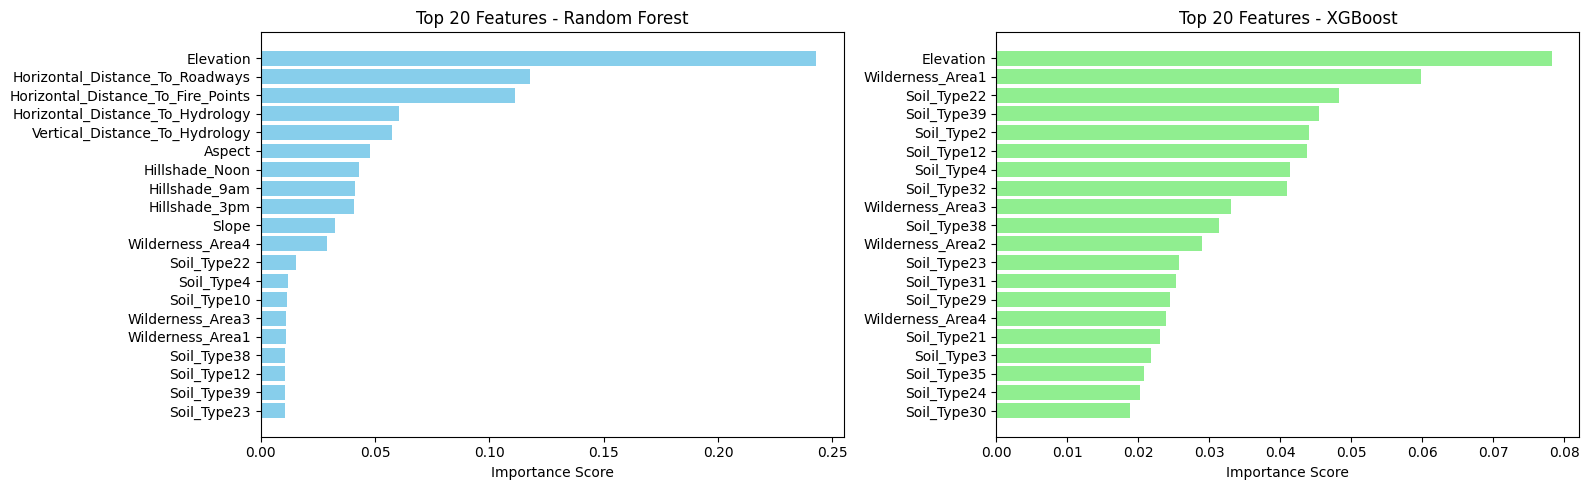

In [80]:
def get_top_features(importances, X, top_n=20):
    feat_imp = pd.DataFrame({
        "Feature": X.columns,
        "Importance": importances
    }).sort_values(by="Importance", ascending=False).head(top_n)
    return feat_imp

# Get top 20 for RF and XGB
rf_imp = get_top_features(rf.feature_importances_, X)
xgb_imp = get_top_features(xgb.feature_importances_, X)

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Random Forest
axes[0].barh(rf_imp["Feature"], rf_imp["Importance"], color="skyblue")
axes[0].invert_yaxis()
axes[0].set_title("Top 20 Features - Random Forest")
axes[0].set_xlabel("Importance Score")

# XGBoost
axes[1].barh(xgb_imp["Feature"], xgb_imp["Importance"], color="lightgreen")
axes[1].invert_yaxis()
axes[1].set_title("Top 20 Features - XGBoost")
axes[1].set_xlabel("Importance Score")

plt.tight_layout()
plt.show()

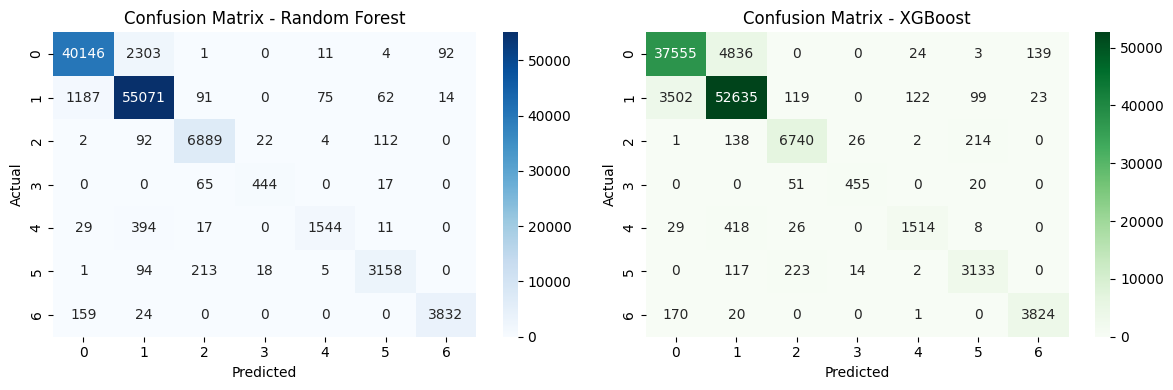

In [86]:
# Compute confusion matrices
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_xgb = confusion_matrix(y_test_xgb, y_pred_xgb)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Random Forest Heatmap
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Confusion Matrix - Random Forest")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# XGBoost Heatmap
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Confusion Matrix - XGBoost")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

**Takeaway:**
- RF = better performance but slower.
- XGB = faster but slightly less accurate.

For production: If you need real-time predictions, XGBoost is usually preferred. If you need highest accuracy, Random Forest seems better here.